# About the Dataset

### World Happiness Report Data for 2017 from their website:

The first World Happiness Report was published in April, 2012, in support of the UN High Level Meeting on happiness and well-being. Since then the world has come a long way. Increasingly, happiness is considered to be the proper measure of social progress and the goal of public policy. In June 2016 the OECD committed itself “to redefine the growth narrative to put people’s well-being at the center of governments’ efforts”. In February 2017, the United Arab Emirates held a full-day World Happiness meeting, as part of the World Government Summit. Now on World Happiness Day, March 20th, we launch the World Happiness Report 2017, once again back at the United Nations, again published by the Sustainable Development Solutions Network, and now supported by a generous three-year grant from the Ernesto Illy Foundation. Some highlights are as follows.

Source: Helliwell, J., Layard, R., & Sachs, J. (2017). World Happiness Report 2017, New York: Sustainable Development Solutions Network.

##### Dictionary:

![Dictionary](img/DictionaryData.png)

##### Labeled Visualized Happiness Data Comparison of various countries on varous factors:

![data1-image](img/Data1_Happiness.png)


![data2-image](img/Data2_Happiness.png)


![data3-image](img/Data3_Happiness.png)





### Review of Regression and Correlation [ To be Completed ]

What is Linear Regression?

Why use Linear Regression?

What is Correlation?

Explain Regression with formulas
    Cost function
    Gradient descent step
    Optimal Coefficients
    Predicting the value
    Accuracy Score
    Plotting

Explain Correlation with formula and graphs

    Correlation Formula
    Correlation Coeff
    Correlation Values and meaning of a positive or negative correlation
    Calculates a Pearson correlation coefficient and the p-value for testing non-correlation.

The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.



# Explaination of the Code






### Import important libraries 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import scipy as sp

### Read the dataset

In [2]:
# data=pd.read_excel("World Happiness Data.xlsx")
data=pd.read_csv("World Happiness Data.csv")
data1=data[data.year==2016]
data1=data1.reset_index()

In [3]:
data1.head()

,index,WP5 Country,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year
0,8,Afghanistan,Afghanistan,2016,4.220169,7.497288,0.559072,49.871265,0.522566,0.057393,0.793246,0.564953,0.348332,0.324990,NaN,NaN,1.796219,0.425627
1,17,Albania,Albania,2016,4.511101,9.282300,0.638411,68.698380,0.729819,-0.017927,0.901071,0.675244,0.321706,0.400910,NaN,NaN,2.646668,0.586701
2,22,Algeria,Algeria,2016,5.388171,9.549138,0.748150,64.829948,NaN,NaN,NaN,0.668838,0.371372,NaN,NaN,NaN,2.109472,0.391501
3,37,Argentina,Argentina,2016,6.427221,NaN,0.882819,67.443993,0.847702,NaN,0.850924,0.841907,0.311646,0.419562,NaN,NaN,2.127109,0.330953
4,48,Armenia,Armenia,2016,4.325472,8.989569,0.709218,65.409470,0.610987,-0.155814,0.921421,0.593600,0.437228,0.184713,NaN,NaN,2.126364,0.491591


# Without polynomial Features

Accuracy of prediction on training set is :  0.9629631501859733
Accuracy of prediction on test set is :  0.8248080483418228


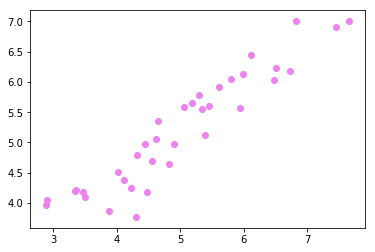

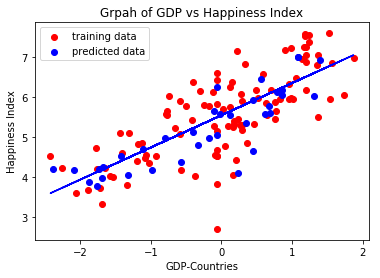

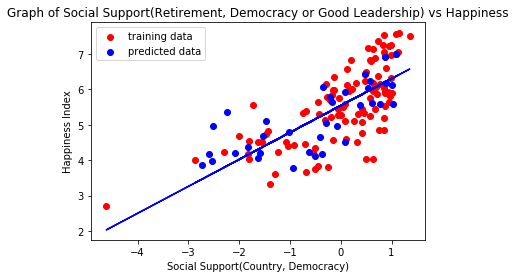

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression as LR

# data=pd.read_excel("World Happiness Data.xlsx")
data=pd.read_csv("World Happiness Data.csv")
data1=data[data.year==2016]
data1=data1.reset_index()

data1=data1.drop('index',axis=1)
data1=data1.drop("WP5 Country",axis=1)
data1=data1.drop(["country","year"],axis=1)
Y=data1["Life Ladder"].values
X=data1.drop(["Life Ladder","Democratic Quality","Delivery Quality","Standard deviation of ladder by country-year","Standard deviation/Mean of ladder by country-year"],axis=1).values
data1=data1.drop(["Life Ladder","Democratic Quality","Delivery Quality","Standard deviation of ladder by country-year","Standard deviation/Mean of ladder by country-year"],axis=1)

# Here the data is being imputed and the missing values are being replaced with the mean of all the values
data1
imp=Imputer(missing_values="NaN",strategy="mean")
X=imp.fit_transform(X)
data1


# Normalize the data using sklearn
# Converting features to degree 2
# from sklearn.preprocessing import PolynomialFeatures
# pol_reg=PolynomialFeatures(degree=2)
# X=pol_reg.fit_transform(X)

xtrain,xtest,ytrain,ytest=train_test_split(X,Y)


from sklearn.preprocessing import StandardScaler as SC
sc_X=SC()
xtrain=sc_X.fit_transform(xtrain)
xtest=sc_X.transform(xtest)

from sklearn.ensemble import RandomForestRegressor as DTC
def PearsonR(x,y):
    return(sp.stats.pearsonr(x,y))
def AccuracyScore(ytrue,ypred):
    return r2_score(ytrue,ypred)  
def AccuracyScore(ytrue,ypred):
    return r2_score(ytrue,ypred) 
# alg=LR()
# alg.fit(xtrain,ytrain)
# ?DecisionTreeClassifier
# labelencoder=LabelEncoder()
# ytrain=labelencoder.fit_transform(ytrain)
alg=DTC(n_estimators=500)
alg.fit(xtrain,ytrain)
# print('Intercept: ',alg.intercept_)
# print("Coefficients : ",alg.coef_)
ypred=alg.predict(xtest)
print('Accuracy of prediction on training set is : ',AccuracyScore(ytrain,alg.predict(xtrain)))
print('Accuracy of prediction on test set is : ',AccuracyScore(ytest,ypred))

plt.scatter(ytest,ypred,color="violet")
plt.show()

print()
print()
print()
print()
print()

plt.scatter(xtrain[:,0],ytrain,color="red", label="training data")
plt.scatter(xtest[:,0],ypred,color="blue" ,label="predicted data")
alg_pred=LR()
alg_pred.fit(xtrain[:,0].reshape(-1,1),ytrain)
plt.plot(xtrain[:,0],alg_pred.predict(xtrain[:,0].reshape(-1,1)),color="blue")
# plt.scatter(xtest[:,0],ytest,color="black")
plt.xlabel("GDP-Countries")
plt.ylabel("Happiness Index")
plt.title("Grpah of GDP vs Happiness Index")
plt.legend(loc='upper left')
plt.show()

# Metrics for judging the result, calculating correlation
x=xtest[:,0]
y=alg_pred.predict(ytest.reshape(-1,1))
# print('Correlation between data is : ',PearsonR(x,y)[0])

plt.scatter(xtrain[:,1],ytrain,color="red", label="training data")
plt.scatter(xtest[:,1],ypred,color="blue", label="predicted data")
alg_pred=LR()
alg_pred.fit(xtrain[:,1].reshape(-1,1),ytrain)
plt.plot(xtrain[:,1],alg_pred.predict(xtrain[:,1].reshape(-1,1)),color="blue")
plt.xlabel("Social Support(Country, Democracy)")
plt.ylabel("Happiness Index")
plt.title("Graph of Social Support(Retirement, Democracy or Good Leadership) vs Happiness")
plt.legend(loc='upper left')

plt.show()
x=xtest[:,1]
y=alg_pred.predict(ytest.reshape(-1,1))
# print('Correlation between data is : ',PearsonR(x,y)[0])



# With Polynomial Features

In [5]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import scipy as sp

# data=pd.read_excel("World Happiness Data.xlsx")
data=pd.read_csv("World Happiness Data.csv")
data1=data[data.year==2016]
data1=data1.reset_index()

data1=data1.drop('index',axis=1)
data1=data1.drop("WP5 Country",axis=1)
data1=data1.drop(["country","year"],axis=1)
Y=data1["Life Ladder"].values
X=data1.drop(["Life Ladder","Democratic Quality","Delivery Quality","Standard deviation of ladder by country-year","Standard deviation/Mean of ladder by country-year"],axis=1).values
data1=data1.drop(["Life Ladder","Democratic Quality","Delivery Quality","Standard deviation of ladder by country-year","Standard deviation/Mean of ladder by country-year"],axis=1)

# Here the data is being imputed and the missing values are being replaced with the mean of all the values
data1
imp=Imputer(missing_values="NaN",strategy="mean")
X=imp.fit_transform(X)
data1
# Normalize the data using sklearn
# Converting features to degree 2
from sklearn.preprocessing import PolynomialFeatures
pol_reg=PolynomialFeatures(degree=2)
X=pol_reg.fit_transform(X)


xtrain,xtest,ytrain,ytest=train_test_split(X,Y)


# from sklearn.preprocessing import StandardScaler as SC
# sc_X=SC()
# xtrain=sc_X.fit_transform(xtrain)
# xtest=sc_X.transform(xtest)
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression as LR

def PearsonR(x,y):
    return(sp.stats.pearsonr(x,y))
def AccuracyScore(ytrue,ypred):
    return r2_score(ytrue,ypred)  
def AccuracyScore(ytrue,ypred):
    return r2_score(ytrue,ypred) 
alg=LR()
alg.fit(xtrain,ytrain)
print('Intercept: ',alg.intercept_)
print("Coefficients : ",alg.coef_)
ypred=alg.predict(xtest)
print('Accuracy of prediction on training set is : ',AccuracyScore(ytrain,alg.predict(xtrain)))
print('Accuracy of prediction on test set is : ',AccuracyScore(ytest,ypred))


Intercept:  32913953133.87426
Coefficients :  [-3.29139531e+10  5.35380870e-01 -2.45477399e+01 -2.61861931e-01
  1.51069313e+01  3.01855868e+00  2.34174810e+01  7.31907198e+00
 -3.29557816e+01 -1.65816933e+00 -7.74229108e-02 -8.44073184e-01
  1.82832924e-02  9.61666856e-01  3.82792192e-01 -4.44855131e-01
  1.08774843e+00  8.21969700e-01 -1.38714128e+00 -1.09187023e+00
  2.71840506e-01  1.75299900e+01  7.00707875e-01  1.00783544e+01
 -9.76892185e+00  5.44892830e+00  9.21269822e+00 -1.07219180e-03
 -2.01983227e-01 -6.43412475e-02 -4.25025374e-02  7.39483288e-02
  9.88964687e-02  2.77870976e-01 -1.35629049e+01  1.05738411e+00
 -1.24479754e+01  1.32454915e+01 -4.34143874e+00 -3.60158463e+00
  3.76872636e+00  1.12631287e-01 -7.35369953e+00  4.20417829e+00
  1.56655601e+00 -6.68953734e+00 -1.05683596e+01  6.82193804e+00
  3.91405073e-01 -7.64090429e+00  1.23580388e+01 -1.78287991e+01
  4.00167889e+00  4.17560849e+00  2.90370869e+00]
Accuracy of prediction on training set is :  0.908837130696